In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [2]:
# loading the dataset into dataframe 

df = pd.read_csv('Churn_Modelling.csv')
df.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [3]:
# dropping irrelevant columns

df1 = df.drop(['RowNumber','CustomerId','Surname'],axis='columns')

In [4]:
df1.shape

(10000, 11)

## Exploratory Data Analysis

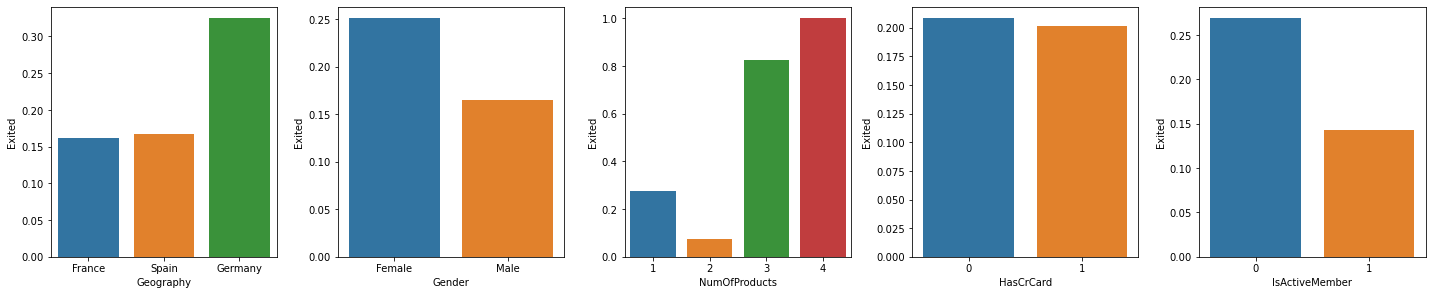

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

In [5]:
# barplots for categorical data

column = ['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember']
fig=plt.figure(figsize=(20,20))
j = 1
for i in column :
  ax=fig.add_subplot(5,5,j)
  j = j + 1
  plt.figure(figsize=(2, 2))
  sns.barplot(x=i,y='Exited',data=df1,ci=None,ax=ax)
  # ax.set_title(i+" Distribution",color='DarkRed')
  # ax.set_yscale('log')
  fig.tight_layout()  
plt.show()

### Hist Plots for continuos Data

<AxesSubplot:xlabel='Tenure', ylabel='Count'>

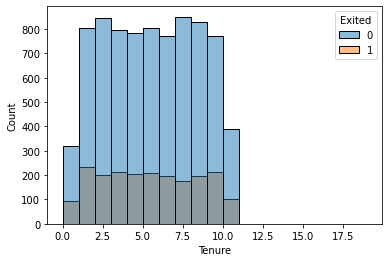

In [6]:
sns.histplot(df1, x='Tenure', bins = range(0,20), hue='Exited')

<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

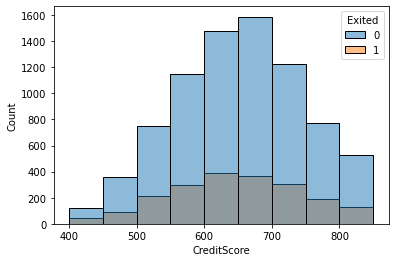

In [7]:
sns.histplot(df1, x='CreditScore', bins = range(400,900,50), hue='Exited')

<AxesSubplot:xlabel='Age', ylabel='Count'>

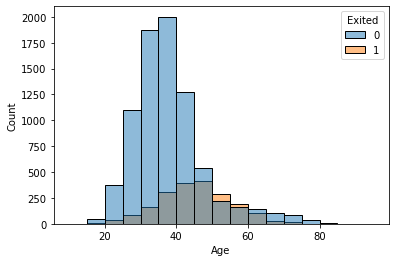

In [8]:
sns.histplot(df1, x='Age', bins = range(10,100,5), hue='Exited')

In [9]:
df1['EstimatedSalary'].mean()

100090.239881

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

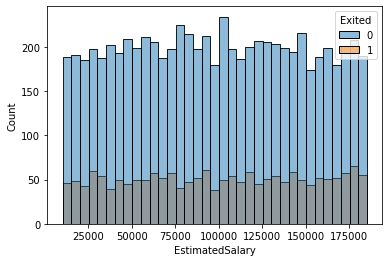

In [10]:
sns.histplot(df1, x='EstimatedSalary', bins = range(10090,190090,5000), hue='Exited')

## Data Preprocessing

In [11]:
# performing one-hot encoding for the categorical features having text

cols_to_encode = ['Geography','Gender']
df2 = pd.get_dummies(df1,cols_to_encode,drop_first=True)

In [12]:
# scaling data using MinMaxScaler

scaler = MinMaxScaler()
cols_to_scale = ['Age','Tenure','Balance','EstimatedSalary','CreditScore']
df2[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [13]:
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,0.538,0.324324,0.2,0.000000,1,1,1,0.506735,1,0,0,0
1,0.516,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,1,0
2,0.304,0.324324,0.8,0.636357,3,1,0,0.569654,1,0,0,0
3,0.698,0.283784,0.1,0.000000,2,0,0,0.469120,0,0,0,0
4,1.000,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,1,0


In [14]:
X = df2.drop(['Exited'],axis=1)

In [15]:
Y = df2['Exited']

In [16]:
# splitting data for train test sets

X_train , X_test , Y_train , Y_test = train_test_split(X,Y,random_state=8,test_size=0.3,stratify=Y)

## Neural Network creation

In [17]:
# Multi MLP Generator - 1 Layer
training_accuracy = []
testing_accuracy = []
Layer1 = range(10,100,10)
LayersComb = len(Layer1)
Step=0
score=0

for i in Layer1 :
    mlp = MLPRegressor(hidden_layer_sizes=(i),activation="logistic" ,random_state=1, max_iter=2000).fit(X_train, Y_train)
    Y_pred_train = mlp.predict(X_train).round()
    training_accuracy.append(accuracy_score(Y_train, Y_pred_train))
    Y_pred_test = mlp.predict(X_test).round()
    acc_score = accuracy_score(Y_test,Y_pred_test)
    testing_accuracy.append(acc_score)
    Step = Step + 1
    if score < acc_score:
        score = acc_score
        best_Layer1 = i
        best_Step = Step
    
    print('Step ', Step, ' of ', LayersComb, ' Layer1: ', i,' Accuracy', acc_score.round(4))    
    print('Best Accuracy Score', score.round(4), ' Best Layer1: ', best_Layer1, ' do Step:', best_Step)

Step  1  of  9  Layer1:  10  Accuracy 0.8067
Best Accuracy Score 0.8067  Best Layer1:  10  do Step: 1
Step  2  of  9  Layer1:  20  Accuracy 0.8083
Best Accuracy Score 0.8083  Best Layer1:  20  do Step: 2
Step  3  of  9  Layer1:  30  Accuracy 0.8037
Best Accuracy Score 0.8083  Best Layer1:  20  do Step: 2
Step  4  of  9  Layer1:  40  Accuracy 0.8047
Best Accuracy Score 0.8083  Best Layer1:  20  do Step: 2
Step  5  of  9  Layer1:  50  Accuracy 0.8113
Best Accuracy Score 0.8113  Best Layer1:  50  do Step: 5
Step  6  of  9  Layer1:  60  Accuracy 0.806
Best Accuracy Score 0.8113  Best Layer1:  50  do Step: 5
Step  7  of  9  Layer1:  70  Accuracy 0.8093
Best Accuracy Score 0.8113  Best Layer1:  50  do Step: 5
Step  8  of  9  Layer1:  80  Accuracy 0.8113
Best Accuracy Score 0.8113  Best Layer1:  50  do Step: 5
Step  9  of  9  Layer1:  90  Accuracy 0.8133
Best Accuracy Score 0.8133  Best Layer1:  90  do Step: 9


<AxesSubplot:>

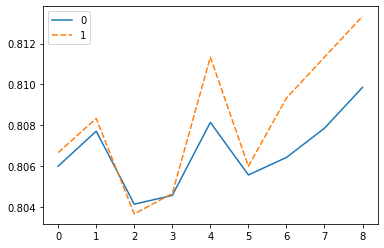

In [18]:
sns.lineplot(data=[training_accuracy,testing_accuracy])

In [ ]:
training_accuracy = []
testing_accuracy = []
Layer1 = range(10,70,20)
Layer2 = range(10,70,20)
step=0
score=0
LayerComb = len(Layer1) * len(Layer2)

for i in Layer1:
    for j in Layer2:
        mlp = MLPRegressor(hidden_layer_sizes=(i,j),activation='logistic',random_state=1, max_iter=2000).fit(X_train,Y_train)
        Y_pred_train = mlp.predict(X_train).round()
        training_accuracy.append(accuracy_score(Y_train, Y_pred_train))
        Y_pred_test = mlp.predict(X_test).round()
        acc_score = accuracy_score(Y_test,Y_pred_test)
        testing_accuracy.append(acc_score)
        step = step + 1
        if score < acc_score:
            score = acc_score
            best_Layer1 = i
            best_Layer2 = j
            best_Step = step
        print('Step ', step, ' of ', LayerComb, ' Layer1: ', i,' Layer2: ', j,' Accuracy', acc_score.round(4))    
        print('Best Accuracy Score', score.round(4), ' Best Layer1: ', best_Layer1,' Best Layer2: ', best_Layer2, ' do Step:', best_Step)
        

Step  1  of  9  Layer1:  10  Layer2:  10  Accuracy 0.8213
Best Accuracy Score 0.8213  Best Layer1:  10  Best Layer2:  10  do Step: 1
Step  2  of  9  Layer1:  10  Layer2:  30  Accuracy 0.8433
Best Accuracy Score 0.8433  Best Layer1:  10  Best Layer2:  30  do Step: 2
Step  3  of  9  Layer1:  10  Layer2:  50  Accuracy 0.849
Best Accuracy Score 0.849  Best Layer1:  10  Best Layer2:  50  do Step: 3
Step  4  of  9  Layer1:  30  Layer2:  10  Accuracy 0.8117
Best Accuracy Score 0.849  Best Layer1:  10  Best Layer2:  50  do Step: 3
Step  5  of  9  Layer1:  30  Layer2:  30  Accuracy 0.812
Best Accuracy Score 0.849  Best Layer1:  10  Best Layer2:  50  do Step: 3
Step  6  of  9  Layer1:  30  Layer2:  50  Accuracy 0.852
Best Accuracy Score 0.852  Best Layer1:  30  Best Layer2:  50  do Step: 6
Step  7  of  9  Layer1:  50  Layer2:  10  Accuracy 0.848
Best Accuracy Score 0.852  Best Layer1:  30  Best Layer2:  50  do Step: 6


In [ ]:
sns.lineplot(data=[training_accuracy,testing_accuracy])

In [ ]:
# a network with 30 nuerons in layer1 and 50 nuerons in layer2

final_mlp = MLPRegressor(hidden_layer_sizes=(30,50),activation='logistic',random_state=1, max_iter=2000).fit(X_train,Y_train)

In [ ]:
# storing predicted result for X_test in Y_test_pred

Y_test_pred = final_mlp.predict(X_test).round()

In [ ]:
accuracy_score(Y_test,Y_test_pred)

In [ ]:
# confusion matrix and classification report

cm = confusion_matrix(Y_test,Y_test_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(Y_test,Y_test_pred))

In [ ]:
training_accuracy = []
testing_accuracy = []
best_score = 0
best_estimator = 0
step = 0
estimators = range(10,110,10)
total_ = len(estimators)
for i in estimators:
    model = RandomForestClassifier(n_estimators=i)
    model.fit(X_train,Y_train)
    training_accuracy.append(model.score(X_train,Y_train))
    acc_score = model.score(X_test,Y_test) 
    testing_accuracy.append(acc_score)
    step = step + 1
    if best_score < acc_score:
        best_score = acc_score
        best_step = step
        best_estimator = i
    print('Step ', step, ' of ', total_, ' n_estimaotrs: ', i,' Accuracy', acc_score.round(4))    
    print('Best Accuracy Score', best_score.round(4), ' Best Estimators: ', best_estimator, ' do Step:', best_step)

In [ ]:
# Random Forest Classifier with estimators = 60

final_rfc = RandomForestClassifier(n_estimators=60).fit(X_train,Y_train)

In [ ]:
final_rfc.score(X_test,Y_test)

In [ ]:
Y_test_pred_rfc = final_rfc.predict(X_test)

In [ ]:
# confusion matrix and classification report

cm = confusion_matrix(Y_test,Y_test_pred_rfc)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(Y_test,Y_test_pred_rfc))

#### Accuracy and classification report for Random Forest Classifier with 60 estimators are better than the neural net with (30,50) as layer size